# Sources

In prose, objects detected in astronomical images are represented by `Source` objects. To encompass the large variety of sources encountered in astronomical images, prose fatures three kinds of sources:

- [PointSource](prose.core.source.PointSource): star
- [ExtendedSource](prose.core.source.ExtendedSource): comet, galaxy or lensed source
- [TraceSource](prose.core.source.TraceSource): diffracted spectrum, satellite streak or cosmic ray

To demonstrate how to use these objects, we will work on the following example image:

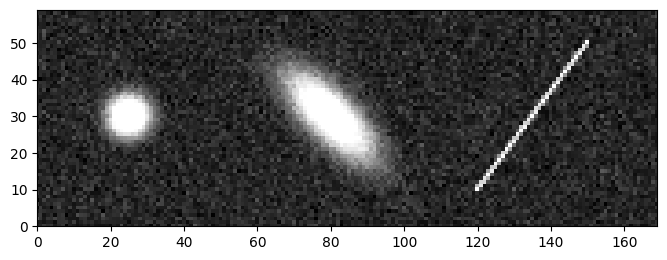

In [1]:
from prose.simulations import source_example

im = source_example()
_ = im.show()

## Detection

To detect these sources, detection blocks from the `prose.blocks.detection` module can be used:

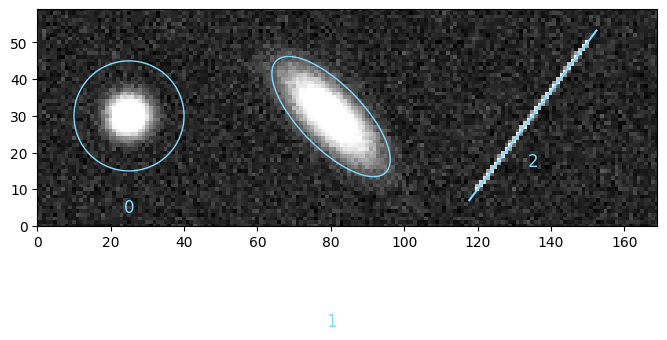

In [2]:
from prose import blocks

im = blocks.detection.AutoSourceDetection(min_area=2.)(im)
_ = im.show()

```{note}
Source-specific detection blocks are also available, like the `PointSourceDetection`, as well as blocks with legacy detection algorithms such as `DAOFindStars`
```

From here, sources are located in the `Image.sources` object

In [3]:
im.sources

array([PointSource(a=7.39651508155956, b=7.244064899085314, orientation=0.10802411572722903, coords=array([24.9838298 , 29.98881693]), peak=700.5146848551715, i=0, discarded=False),
       ExtendedSource(a=19.37097797040066, b=7.8415189710420945, orientation=2.345302033849604, coords=array([80.06178918, 29.81130811]), peak=616.129081477278, i=1, discarded=False),
       TraceSource(a=28.92814480000525, b=0.8554885458915085, orientation=0.9277663291595878, coords=array([135.0716261 ,  30.12861331]), peak=513.2559020765627, i=2, discarded=False)],
      dtype=object)

where we can identify the three types of sources, like an extended source at index 1

In [4]:
print(im.sources[1])

⬭ ExtendedSource 1
  ----------------
  coords   80.06   29.81
  a, b     19.37    7.84
  e         0.40


## Sources properties

Such sources contain useful properties and methods used throughout prose to perform image processing.

### Apertures

Apertures from the `photutils.aperture` module can easily be instantiated from a `Source` object

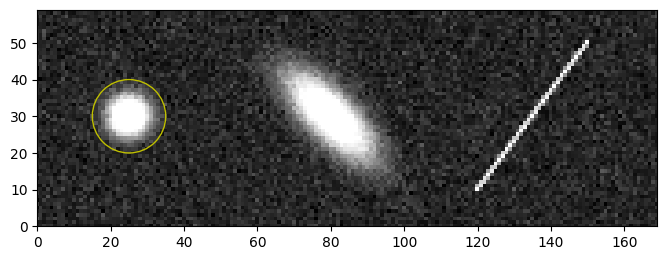

In [5]:
import matplotlib.pyplot as plt

source = im.sources[0]
aperture = source.circular_aperture(10, scale=False)

# plotted on top of the image
im.show(sources=False)
_ = aperture.plot(color="y")

For automatic treatments, the `Source.aperture` method provides an aperture specific to each type of source

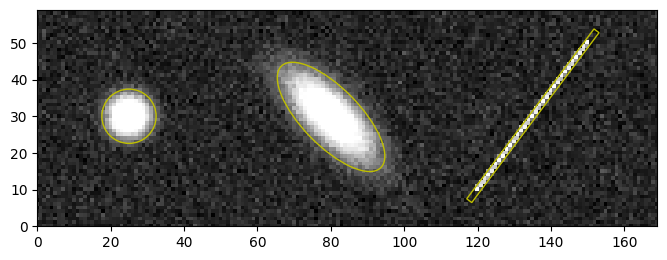

In [6]:
im.show(sources=False)

for source in im.sources:
    aperture = source.aperture()
    _ = aperture.plot(color="y")

and associated annulus methods

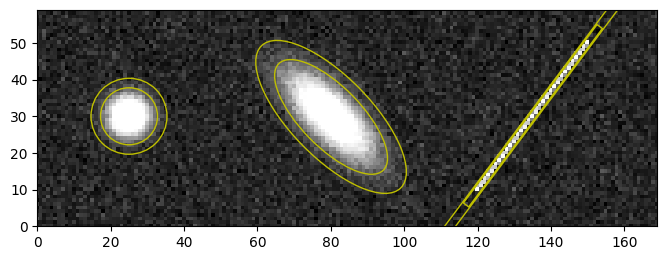

In [7]:
im.show(sources=False)

for source in im.sources:
    aperture = source.annulus()
    _ = aperture.plot(color="y")